# Random Forest Regression Model

In [52]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [53]:
# Setting random seed for reproducibility
np.random.seed(42)

In [54]:
# Creating pipeline for Random Forest Regressor

# Scales the data and then applies the Random Forest model
pipeline = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor(random_state=42))])

In [55]:
# Creating parameter grid for hyperparameter tuning
param_grid ={'rf__n_estimators': [100, 200, 300],
                'rf__max_depth': [None, 10, 20],
                'rf__max_features': ['sqrt', 'log2', 1.0],
                'rf__min_samples_split': [2, 5, 10]}


In [56]:
# Performing Grid Search with Cross-Validation

# Using 5 fold cross-validation to find the best hyperparameters

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='r2', verbose=3)

# Importing training data
X_train = pd.read_csv('../data/train_set_X.csv')
y_train = pd.read_csv('../data/train_set_y.csv').values.ravel() # Ensuring y is in the correct shape

# Fitting the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=-0.103 total time=   0.1s
[CV 2/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=-0.118 total time=   0.2s
[CV 4/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=-0.049 total time=   0.2s
[CV 5/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=-0.104 total time=   0.2s
[CV 3/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=-0.082 total time=   0.2s
[CV 1/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=200;, score=-0.092 total time=   0.3s
[CV 3/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=200;, score=-0.090 total

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rf__max_depth': [None, 10, ...], 'rf__max_features': ['sqrt', 'log2', ...], 'rf__min_samples_split': [2, 5, ...], 'rf__n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [57]:
# Finding the best parameters and model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

optimal_model = grid_search.best_estimator_
print("Optimized model:", grid_search.best_estimator_)


Best Parameters: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_split': 10, 'rf__n_estimators': 300}
Optimized model: Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       min_samples_split=10, n_estimators=300,
                                       random_state=42))])


In [58]:
grid_search.best_score_

np.float64(-0.05016460483482486)

In [59]:
# Importing test data

X_test = pd.read_csv('../data/test_set_X.csv')
y_test = pd.read_csv('../data/test_set_y.csv').values.ravel() # Ensuring y is in the correct shape

# Making predictions on the test set

y_pred = optimal_model.predict(X_test)

In [60]:
# Evaluating model performance

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Test R2 Score: {r2}")
print(f"Test Mean Squared Error: {mse}")

Test R2 Score: -0.03284603862400637
Test Mean Squared Error: 71.55789100417033


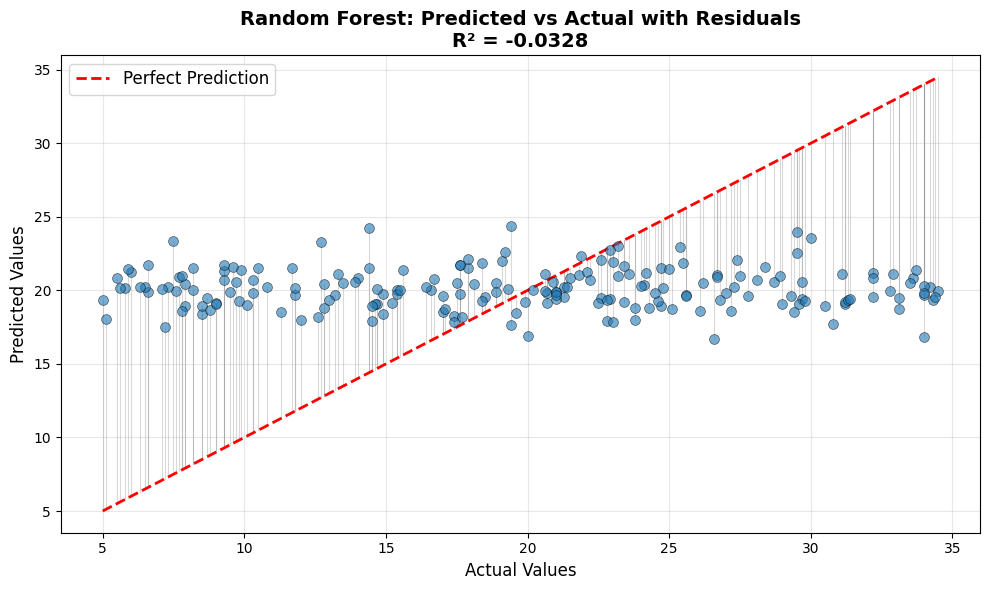

In [62]:
# Predicted vs Actual plot

plt.figure(figsize=(10, 6))

# Plotting the points
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5, s=50, zorder=3)

# Adding residual lines from each point to the perfect prediction line
for actual, predicted in zip(y_test, y_pred):
    plt.plot([actual, actual], [actual, predicted], 'gray', alpha=0.3, linewidth=0.8, zorder=1)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction', zorder=2)

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'Random Forest: Predicted vs Actual with Residuals\nR² = {r2:.4f}', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../output/random_forest_predicted_vs_actual.png', dpi=300)
plt.show()